# Pandas

В этом задании предлагается провести небольшой анализ данных датасета [studens](https://archive.ics.uci.edu/ml/datasets/Student+Performance#), в котором содержатся данные об успеваемости учеников старших классов.
Описание полей вы можете найти на [сайте](https://archive.ics.uci.edu/ml/datasets/Student+Performance#)

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# маскимальное кол-во отображаемых столбцов
pd.set_option('display.max_columns', 13)
# маскимальное кол-во отображаемых строк
pd.set_option('display.max_rows', 10)
# максимальная ширина столбца
pd.set_option('display.max_colwidth', 45)
# максимальная ширина отображения
pd.set_option('display.width', 80)

## Задание 1 ★☆☆

Считайте файл в переменную `data` определите размер таблицы.

In [5]:
ls -lh data/student-mat.csv

-rwxr-xr-x 1 mike mike 56K Oct 12 16:40 data/student-mat.csv*


In [6]:
data = pd.read_csv("data/student-mat.csv", sep=";")

In [8]:
data.head()

,school,sex,age,address,famsize,Pstatus,...,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,...,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,...,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,...,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,...,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,...,2,5,4,6,10,10


In [9]:
# размер это tuple (количество строк, количество столбцов)
shape = data.shape

Значение для формы

In [10]:
print(' '.join(map(str, shape)))

395 33


Посмотрите первые пять строк

In [11]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,...,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,...,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,...,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,...,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,...,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,...,2,5,4,6,10,10


Выведите список названий столбцов

In [12]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Задание 2 ★☆☆

Определите количество студентов, у которых оценка G1 выше среднего.

In [25]:
g1_mean = data['G1'].mean()
v1 = data[ data['G1'] > g1_mean ].shape[0]
v2 = (data['G1'] > g1_mean).sum()
assert( v1 == v2 )
more_then_mean = v2

Значение для формы

In [26]:
print(more_then_mean)

202


## Задание 3 ★☆☆

Определите значение для поля `absences` после сортировки по убыванию по полю `G3`, которое находится на 100 позиции после сортировки (отсчет с 0).

In [44]:
tmp = data['G3'].sort_values(ascending=False)
data.loc[ tmp.index[99:101], ['absences'] ]

,absences
73,2
112,6


In [48]:
absences_at_100 = data.loc[ tmp.index[99], ['absences']][0]

Значение для формы

In [49]:
print(absences_at_100)

2


## Задание 4 ★☆☆

Определите долю студентов женского и мужского пола. 

In [60]:
# получите объект series индексы которого: F и M
serires_object = data['sex'].value_counts() / data.shape[0]

Значение для формы

In [61]:
print("{:.3f} {:.3f}".format(serires_object['M'], serires_object['F']))

0.473 0.527


## Задание 5 ★★☆

Определите общее количество пропущенных значений в таблице.

In [63]:
data.isnull().sum().sum()
#null_count = # TODO

0

Значение для формы

In [34]:
print(null_count)

## Задание 6 ★★☆

Определите уникальные значения 'Mjob', отсортируйте их по алфавиту, сопоставьте каждому значению его позицию в отсорированном списке и замените значения в таблице на его позицию. Например, если вы получили список уникальных значений ['a', 'c', 'f'], то вместо 'a' везде нужно поставить 0, вместо 'c' везде нужно поставить 1, а вместо 'f' - 
2.

In [82]:
tmp = data['Mjob'].unique()
tmp.sort()
tmp = tmp.tolist()
d = dict(zip(tmp, range(len(tmp))))
#data['Mjob_1'] = data['Mjob'].apply(lambda name: d[name])
data['Mjob_1'] = data['Mjob'].map(d)

In [83]:
data['Mjob_1']

0      0
1      0
2      0
3      1
4      2
      ..
390    3
391    3
392    2
393    3
394    2
Name: Mjob_1, Length: 395, dtype: int64

Значение для формы

In [84]:
print(data['Mjob_1'].value_counts().idxmax())

2


## Задание 7 ★★☆

Сгруппируйте данные по полю 'sex' и определите среднее значение, медиану и максимальное значение оценок 'G3'.
Подсказка: agg

In [89]:
# получите data frame с соответсвующими стрками (по полю sex) и столбцами (среднее, медиана и максимум)
data.groupby('sex')['G3'].agg(['mean', 'median', 'max'])

,mean,median,max
sex,,,
F,9.966346,10,19
M,10.914439,11,20


In [90]:
df_grouped = data.groupby('sex')['G3'].agg(['mean', 'median', 'max'])

Значение для формы

In [91]:
print("{:.3f}".format(df_grouped.sum().sum()))

80.881


## Задание 8 ★★☆

Определите среднее количество пропусков занятий ('absences') среди студентов, каждая оценка которых ('G1', 'G2', 'G3') выше медианы.

In [100]:
g1_median = data['G1'].median()
g2_median = data['G2'].median()
g3_median = data['G3'].median()

mean_score_high_level = data['absences'][ (data['G1'] > g1_median) & (data['G2'] > g2_median) & (data['G3'] > g3_median) ].mean()

Значение для формы

In [101]:
print("{:.4f}".format(mean_score_high_level))

4.4926


## Визуализация в pandas

Постройти распределение оценок 'G1'(гистограмму). Используйте методы для data frame и series.

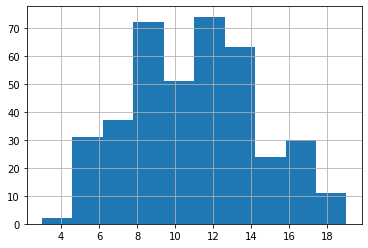

In [102]:
# TODO
data['G1'].hist()

Постройте scatter plot по признакам 'G3'и 'absences'

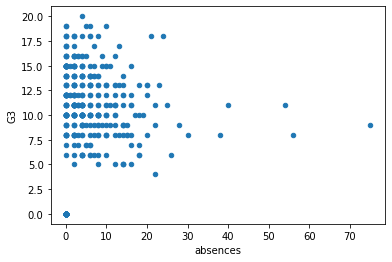

In [105]:
# TODO
data.plot('absences', 'G3', kind='scatter')